# Trabajo 4 .
Desarrollo del Modelo de Covid 19 en el Ecuador.


# Formulacion del Problema:
El Covid 19 a sido un problema muy grave a nivel mundial, por lo que hemos echo nuestro objeto de estudio, ya que podremos predecir datos de infectados en una cierta cantidad de dias mediante la simulacion de eventos y predicciones.
Con variables de interes como son las fechas, y numero de caso que aumenta cada dia, y colocar de entrada estos datos para poder realizar mediante la simulacion del evento.

# Definicion del sistema : 
Se simulara la cantidad de contagiados que existe en el Ecuador con el modelo lineal y el modelo logistico, para asi poder visualizar cual es el modelo que se apega mas a la realidad.


# Formulacion del modelo:
Datos reales proporcionados por usuarios en la red.
Contagiados y muertos tomados de los dataset desde que inicio la pandemia.


# Coleccion de datos: 
Los datos obtenidos para trabajar en el sistema se obtuvieron de una coleccion de dtos verificada y real en la red.

# Implementacion del modelo en el ordenador: 
Se usarara el leguaje de programacion python, con librerias que ya usamos, que a continuacion podremos visualizar :

In [8]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

df = pd.read_csv(url).fillna(0)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-01-23,0.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-24,0.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-25,0.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-26,0.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-27,0.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60475,ZWE,Africa,Zimbabwe,2020-11-29,9822.0,0.0,86.000,275.0,0.0,1.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60476,ZWE,Africa,Zimbabwe,2020-11-30,9950.0,128.0,91.714,276.0,1.0,0.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60477,ZWE,Africa,Zimbabwe,2020-12-01,10129.0,179.0,104.429,277.0,1.0,0.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60478,ZWE,Africa,Zimbabwe,2020-12-02,10129.0,0.0,88.714,277.0,0.0,0.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [23]:
df= df.loc[(df['location'] == 'Ecuador') & (df['total_cases'] != 0)] # filtrando por pais y no ceros 
df=df[['date','total_cases','total_deaths','location']]
x=np.arange(1,len(df)+1,1) # arreglo de x lo creo para simular el numero del dia y el numero de casos
y=np.array(df.values[:,1])
y1=np.array(df.values[:,2])
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df

,date,total_cases,total_deaths,location
15839,60,6.0,0.0,Ecuador
15840,61,6.0,0.0,Ecuador
15841,62,7.0,0.0,Ecuador
15842,63,10.0,0.0,Ecuador
15843,64,13.0,0.0,Ecuador
...,...,...,...,...
16112,333,192117.0,13423.0,Ecuador
16113,334,192685.0,13461.0,Ecuador
16114,335,193673.0,13501.0,Ecuador
16115,336,194876.0,13562.0,Ecuador


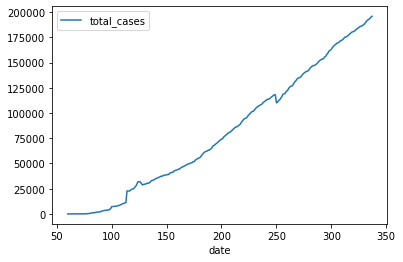

In [24]:
df.plot(x ='date', y='total_cases')



# Verificacion : 
Se realiza los calculos del coeficiente y la pendiente. 

# Diseño de experimentos :
El tiempo que se carga el dataset es de 40 a 50 segundos, es un poco demorado ya que se carga directo de la red, luego los tiempos en el que realiza las operaciones son minimas.

In [25]:
x=np.arange(1,len(df)+1,1) 
y=np.array(df.values[:,1])
y1=np.array(df.values[:,2])

regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(np.array(x).reshape(-1, 1) ,y)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)

Coefficients: 
 [750.82308151]
Independent term: 
 -23718.45656182636


In [26]:
y_prediccion = regr.predict([[360]])
print(int(y_prediccion))

246577


# Experimentacion :
A continuacion podemos observar los resultados de las prediciiones

# Interpretacion
Mediante el sistema de prediccion podemos visulaizar la interpretacion del resultado.

[ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265
 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283
 284 285 286 287 288 289 290 291 292 293 294 295 29

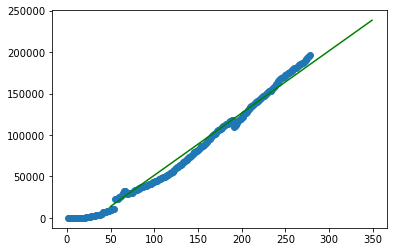

In [27]:
#Graficar
plt.scatter(x, y)
x_real = np.array(range(50, 350))
print(x_real)
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green')
plt.show()

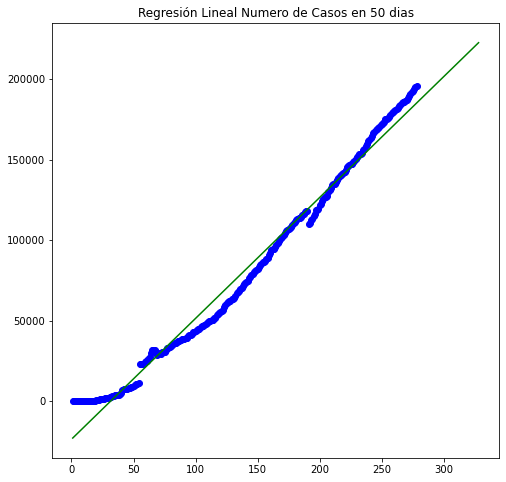

In [29]:
plt.figure(figsize=(8, 8))
plt.scatter(x,y,label='Real', color='blue')
plt.title('Regresión Lineal Numero de Casos en 50 dias');
x_real=np.arange(1,len(df)+51,1)
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green')
plt.show()

# Implementacion
Tenemos el sistema muy bien implementado con sus reglas bien definidas


# Documentacion
[1] D. Quisi, "Simulación Python", GitHub, 2020. [Online]. Habilitado: https://github.com/dquisi/SimulacionPython/blob/master/RegresionTotal.ipynb. [Accessed: 01- Nov- 2020].

# Modelo logistico


In [31]:
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,x,y) #Extraemos los valores de los paramatros
print(exp_fit)

(array([-161417.24046535,   52237.88536816]), array([[ 1.02137944e+08, -2.11010455e+07],
       [-2.11010455e+07,  4.54661088e+06]]))


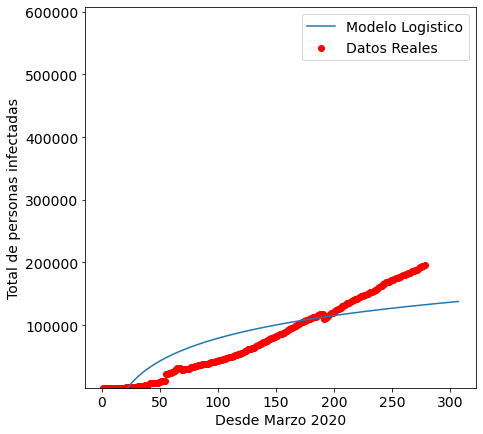

In [33]:
pred_x = list(range(min(x),max(x)+30)) 
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("Desde Marzo 2020")
plt.ylabel("Total de personas infectadas")
plt.ylim((min(y)*0.9,max(y)*3.1))
plt.show()